In [ ]:
install.packages("igraph") 
library(igraph)

In [ ]:
#create network
fb_combined = read_graph("facebook_combined.txt", format='ncol', directed = FALSE)
fb_el = as_edgelist(fb_combined)
fb_graph = graph_from_edgelist(fb_el, directed = FALSE)
plot(fb_graph, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Facebook network")

QUESTION 1: A first look at the network:
QUESTION 1.1: Report the number of nodes and number of edges of the Facebook network.
QUESTION 1.2: Is the Facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.

In [ ]:
# Q1
# 1.1
cat("Number of nodes:", vcount(fb_graph), '\n')
cat("Number of edges:", ecount(fb_graph), '\n')

# 1.2
cat("The graph is connected:",is.connected(fb_graph))

Number of nodes: 4039 
Number of edges: 88234 
The graph is connected: TRUE

QUESTION 2: Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.

In [ ]:
# Q2
cat("Network diameter:", diameter(fb_graph))

Network diameter: 8

QUESTION 3: Plot the degree distribution of the facebook network and report the average degree.

The average degree: 43.69101

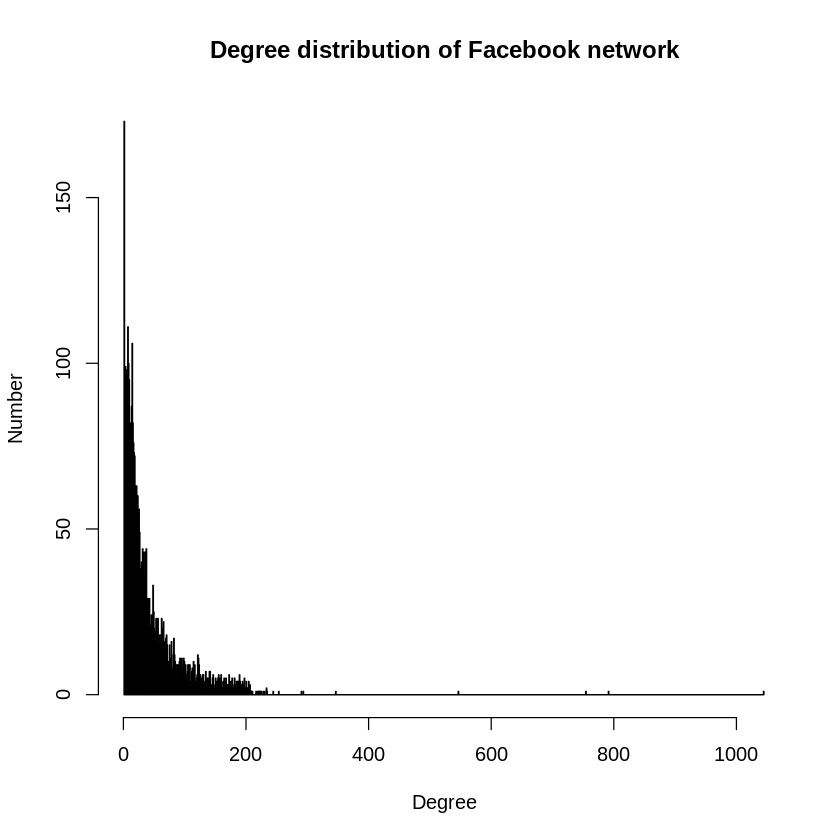

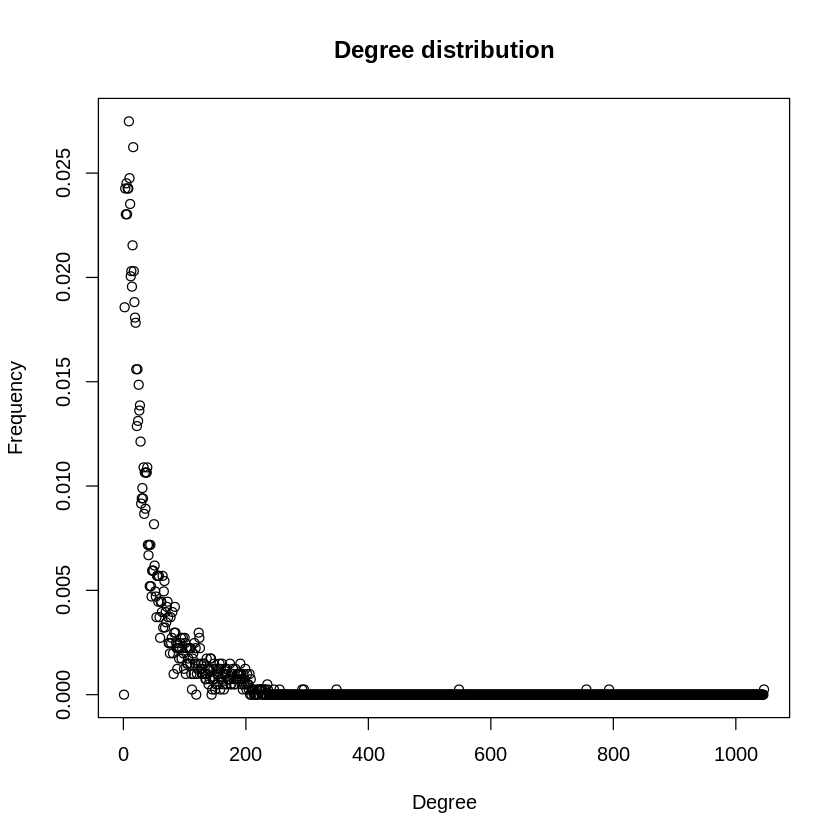

In [ ]:
# Q3
deg = degree(fb_graph, V(fb_graph))
cat('The average degree:', mean(deg))

hist(deg, main = "Degree distribution of Facebook network", xlab = "Degree", ylab="Number", breaks = max(deg) - min(deg))
plot(degree.distribution(fb_graph), main=paste("Degree distribution"), xlab = "Degree", ylab = "Frequency") 

QUESTION 4: Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.


Call:
lm(formula = log(probability) ~ log(degree))

Coefficients:
(Intercept)  log(degree)  
    -0.9922      -1.1802  



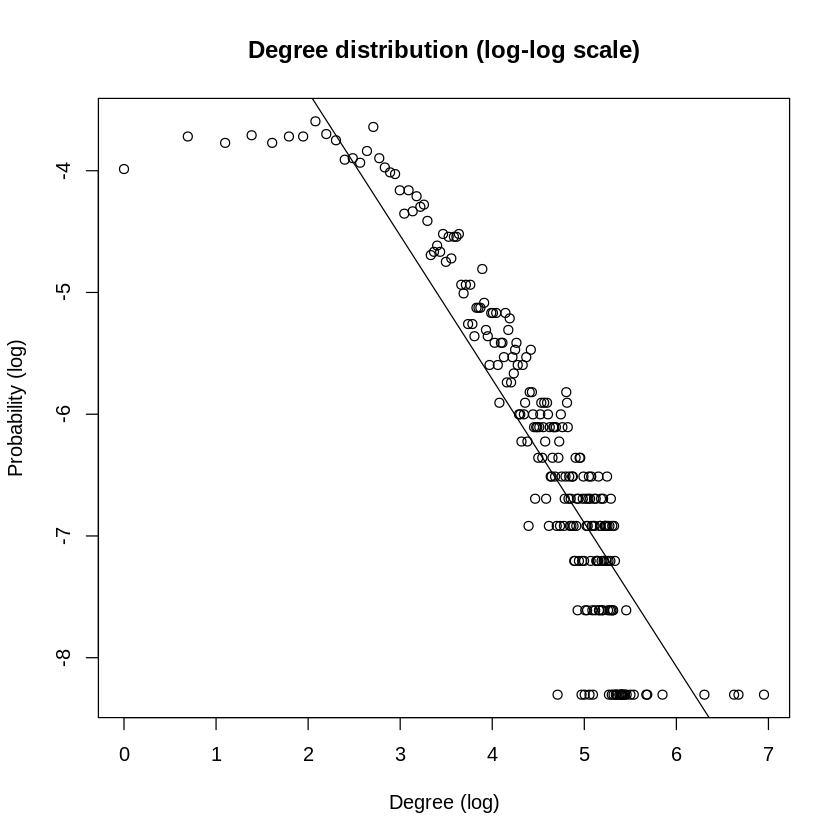

In [ ]:
# Q4

dd_log = function(graph){
    probability = degree.distribution(graph)
    degree = c(0:(length(probability)-1))
    

    # delete zero values
    degree = degree[which(probability != 0)]
    probability = probability[which(probability != 0)]  

    plot(log(degree), 
         log(probability), 
         main=paste("Degree distribution (log-log scale)"),
         xlab = "Degree (log)", 
         ylab = "Probability (log)") 

    linearMod <- lm(log(probability) ~ log(degree))  
    print(linearMod)
    abline(linearMod)
}

dd_log(fb_graph)

QUESTION 5: Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

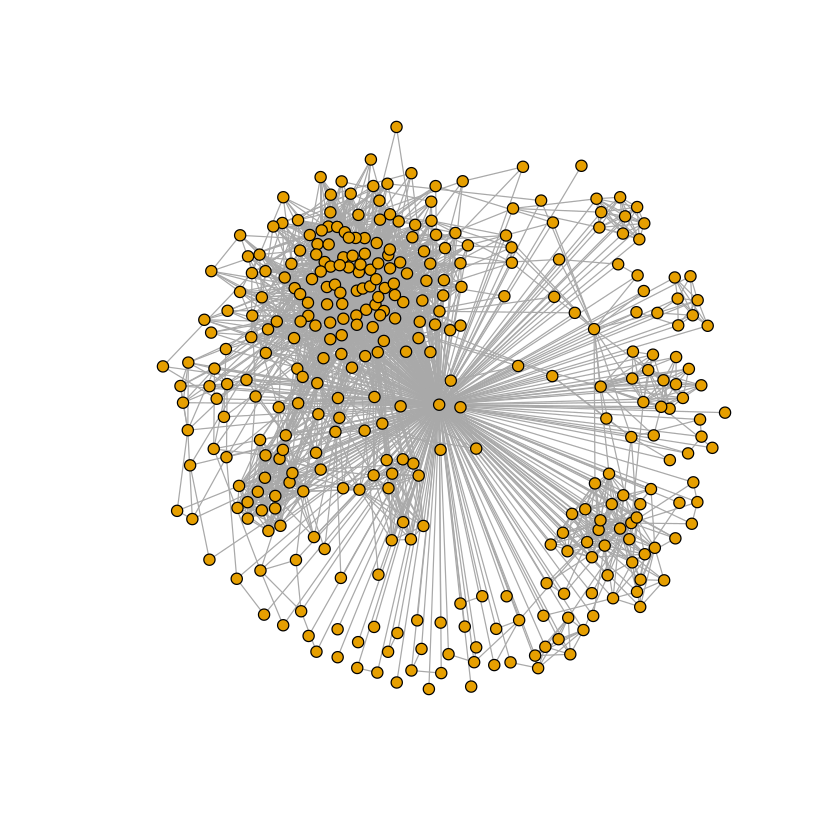

In [ ]:
# Q5

g1 = make_ego_graph(fb_graph, order = 1, nodes=V(fb_graph)[1])[[1]]
plot(g1, edge.arrow.size=0.1, vertex.size=4, vertex.label=NA)

In [ ]:
cat("Number of nodes of this network :", vcount(g1), '\n')
cat("Number of edges of this network :", ecount(g1))

Number of nodes of this network : 348 
Number of edges of this network : 2866

QUESTION 6: What is the diameter of the personalized network? Please state a trivial upper
and lower bound for the diameter of the personalized network.


In [ ]:
# Q6
cat("Network diameter:", diameter(g1))

Network diameter: 2

QUESTION 8: How many core nodes are there in the Facebook network. What is the average degree of the core nodes?


In [ ]:
# Q8
num_cn=0
deg = 0
for (node in seq(vcount(fb_graph))){
    num_neighbors = length(neighbors(fb_graph, node))
    if (num_neighbors > 200){
        num_cn <- num_cn + 1
        deg <- deg + degree(fb_graph, node)
    }
}
cat('The number of core nodes:',num_cn, '\n')
cat('The average degree of core nodes:', deg/num_cn)

The number of core nodes: 40 
The average degree of core nodes: 279.375

In [ ]:
# Helper function
community_structure = function(graph, method = 'Fast-Greedy', node_id){
    if (method == 'Fast-Greedy'){
        com_str = cluster_fast_greedy(graph) 

        plot(graph, mark.groups=groups(com_str), edge.arrow.size=0.1, 
             vertex.color=(com_str$membership), vertex.size=4, vertex.label = NA,
             main=paste("Fast-Greedy, Node ID", node_id))

        cat("Modularity of Fast-Greedy of Node ID =", node_id, "is:", modularity(graph, membership(com_str)))
    }
    else if (method == 'Edge-Betweenness'){
        com_str = cluster_edge_betweenness(graph) 

         plot(graph, mark.groups=groups(com_str), edge.arrow.size=0.1, 
             vertex.color=(com_str$membership), vertex.size=4, vertex.label = NA,
             main=paste("Edge-Betweenness, Node ID", node_id))

         cat("Modularity of Edge-Betweenness of Node ID =", node_id, "is:", modularity(graph, membership(com_str)))
    }
    else{
        com_str = cluster_infomap(graph)

        plot(graph, mark.groups=groups(com_str), edge.arrow.size=0.1, 
             vertex.color=(com_str$membership), vertex.size=4, vertex.label = NA,
             main=paste("InfoMap, Node ID", node_id)) 

        cat("Modularity of Infomap of Node ID =", node_id, "is:", modularity(graph, membership(com_str)))
    }
}

QUESTION 9: For each of the above core node’s personalized network, find the community struc- ture using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node’s personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to different communities should have different color. In this question, you should have 15 plots in total.

In [ ]:
# Q9

node_id_list = c(1,108,349,484,1087)

ego_graph = make_ego_graph(fb_graph, 1, node_id_list)

for (idx in 1:length(node_id_list)){
    personalized_graph = ego_graph[[idx]]
    community_structure(personalized_graph, method = 'Fast-Greedy', node_id_list[idx])
    community_structure(personalized_graph, method = 'Edge-Betweenness', node_id_list[idx])
    community_structure(personalized_graph, method = 'InfoMap', node_id_list[idx])
}


QUESTION 10: For each of the core node’s personalized network (use same core nodes as Question 9), remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as Question 9. Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of Question 9. For visualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.

In [ ]:
# Q10

node_id_list = c(1,108,349,484,1087)
ego_graph = make_ego_graph(fb_graph, 1, node_id_list)

cat('After removing the core nodes:', node_id_list, ', respectively for each graph.', '\n')

for (idx in 1:length(node_id_list)){
    personalized_graph = ego_graph[[idx]]

    node_id = node_id_list[idx]
    node_del = V(personalized_graph)[name==node_id-1]

    personalized_graph = delete_vertices(personalized_graph, node_del)
    community_structure(personalized_graph, method = 'Fast-Greedy', node_id)
    community_structure(personalized_graph, method = 'Edge-Betweenness', node_id)
    community_structure(personalized_graph, method = 'InfoMap', node_id)
}

QUESTION 12: For each of the core node’s personalized network (use the same core nodes as Question 9), plot the distribution histogram of embeddedness and dispersion. In this question, you will have 10 plots.

In [ ]:
# Q12
# Function
dist_embeddedness_dispersion = function(graph, cur_node, node_id){
    # embeddedness
    mutual_friend = intersection(neighbors(graph, node_id), neighbors(graph, cur_node))
    embeddedness = length(mutual_friend)
    if(embeddedness == 0){
        return(c(0, 0))
    }

    # dispersion
    modified_graph = delete_vertices(graph, c(node_id, cur_node))
    mutual_friends = mutual_friend$name
    
    cur_distance = distances(modified_graph, v=mutual_friends, to=mutual_friends)
    dispersion = 0
    diam = diameter(modified_graph)
    
    for (i in 1:length(cur_distance)){
        if (cur_distance[i] == "Inf"){
            dispersion = dispersion + diam + 10
        }
        else{
            dispersion = dispersion + cur_distance[i]
        }
    }
    dispersion = dispersion/2
    return (c(embeddedness, dispersion))
}

In [ ]:

node_id_list = c(1,108,349,484,1087)
ego_graph = make_ego_graph(fb_graph, 1, node_id_list)
for (idx in 1:length(node_id_list)){

    personalized_graph = ego_graph[[idx]]
    embeddedness = c()
    dispersion = c()

    core_node = toString(node_id_list[idx] - 1)
    node_list = c(V(personalized_graph)$name)
    node_list = node_list[which(node_list != core_node)]
    
    for (node in node_list){
        cur_ed = dist_embeddedness_dispersion(fb_graph, toString(node), core_node)
        print(cur_ed)
        cur_embeddedness = cur_ed[1]
        cur_dispersion = cur_ed[2]

        embeddedness = c(embeddedness, cur_embeddedness)
        dispersion = c(dispersion, cur_dispersion)
    }
    hist(embeddedness, main = paste("Distribution histogram of embeddedness, Node ID: ", node_id_list[idx]),
         xlab = "Embeddedness distribution", freq = FALSE, breaks = seq(from = 0, to = max(embeddedness) + 1, by = 1))
    hist(dispersion, main = paste("Distribution histogram of dispersion, Node ID: ", node_id_list[idx]),
         xlab = "dispersion distribution", freq = FALSE, breaks = seq(from = 0, to = max(dispersion) + 1, by = 1))
}

QUESTION 13: For each of the core node’s personalized network, plot the community structure of the personalized network using colors and highlight the node with maximum dispersion. Also, highlight the edges incident to this node. To detect the community structure, use Fast-Greedy algorithm. In this question, you will have 5 plots.
QUESTION 14: Repeat Question 13, but now highlight the node with maximum embeddedness and the node with maximum dispersion (excluding the nodes having zero embeddedness if there
embeddedness
are any). Also, highlight the edges incident to these nodes. Report the id of those nodes.

In [ ]:
# Q13, 14
# Function
comm_struct_fg = function(graph, node_id, highlight_id){
    com_str = cluster_fast_greedy(graph)

    num_node = vcount(graph)
    num_edge = ecount(graph)

    vs = array(2, num_node)
    highlight_node = is.element(V(graph)$name, highlight_id) * array(3, num_node)
    vs = vs + highlight_node

    ec = array('darkgrey', num_edge)
    es = array(0.1, num_edge)
 
    if (length(highlight_id) == 1){
        highlight_edge = incident(graph, highlight_id) 
        highlight_edge = is.element(E(graph), highlight_edge)
        highlight_edge = which(highlight_edge == T)
        ec[highlight_edge] = 'red'
        es[highlight_edge] = 0.8
    }
    else{
        highlight_edge = incident(graph, highlight_id[1]) 
        highlight_edge = is.element(E(graph), highlight_edge)
        highlight_edge = which(highlight_edge == T)
        ec[highlight_edge] = 'red'
        es[highlight_edge] = 0.8


        highlight_edge = incident(graph, highlight_id[2]) 
        highlight_edge = is.element(E(graph), highlight_edge)
        highlight_edge = which(highlight_edge == T)
        ec[highlight_edge] = 'green'
        es[highlight_edge] = 0.8
    }

    plot(graph, mark.groups=groups(com_str), edge.arrow.size=es, vertex.color=(com_str$membership), 
         edge.color=ec, vertex.size=vs, vertex.label = NA,
         main=paste("Fast-Greedy, Node ID", node_id))

    cat("Modularity of Fast-Greedy of Node ID =", node_id, "is:", modularity(graph, membership(com_str)), '\n')
}

In [ ]:
for (idx in 1:length(node_id_list)){

    personalized_graph = ego_graph[[idx]]
    node_id = node_id_list[idx]

    core_node = toString(node_id - 1)
    node_list = c(V(personalized_graph)$name)
    node_list = node_list[which(node_list != core_node)]
    embeddedness = c()
    dispersion = c()
    for (node in node_list){

        cur_ed = dist_embeddedness_dispersion(fb_graph, toString(node), core_node)
        cur_embeddedness = cur_ed[1]
        cur_dispersion = cur_ed[2]
        
        embeddedness = c(embeddedness,cur_embeddedness)
        dispersion = c(dispersion, cur_dispersion)
    }

    max_em = max(embeddedness)
    max_dis = max(dispersion)
    

    max_em_idx = which(embeddedness == max_em)
    max_dis_idx = which(dispersion == max_dis)

   

    max_em_node = node_list[max_em_idx]
    max_dis_node = node_list[max_dis_idx]

    em_nonzero = embeddedness[which(embeddedness != 0)]
    dis_nonzero = dispersion[which(embeddedness != 0)]
    div = dis_nonzero/em_nonzero

    max_div_idx = which(div == max(div))
    max_div_node = node_list[max_div_idx]

    comm_struct_fg(personalized_graph, node_id, c(max_em_node))
    cat('The node with maximum embeddedness is ID:', as.integer(max_em_node)+1, '\n')
    comm_struct_fg(personalized_graph, node_id, c(max_dis_node, max_div_node))
    cat('The node with maximum dispersion (red) is ID:', as.integer(max_dis_node)+1, '\n')
    cat('The node with maximum divation (green) is ID:', as.integer(max_div_node)+1, '\n')
    

 }


QUESTION 16: What is |Nr|, i.e. the length of the list Nr?

In [ ]:
# Q16
# Using matrix
fb_matrix = as.matrix(read.table('facebook_combined.txt', header = FALSE, sep = " ")) + 1
fb_graph = graph_from_edgelist(fb_matrix, directed = FALSE)

neighbor_415 = as_ids(neighbors(fb_graph, 415, mode = "all"))
neighbor_415 = append(neighbor_415, 415)
pg_415 = induced_subgraph(fb_graph, neighbor_415)
degree_list = degree(pg_415, mode = "all")
deg24_list = which(degree_list == 24)
Nr = length(deg24_list)
print(Nr)

QUESTION 17: Compute the average accuracy of the friend recommendation algorithm that uses: • Common Neighbors measure • Jaccard measure
• Adamic Adar measure
Based on the average accuracy values, which friend recommendation algorithm is the best?

In [ ]:
#Question 17 
accuracy_cm = c()
accuracy_ja = c()
accuracy_aa = c()

for(node in deg24_list){
  acccm = c()
  accja = c()
  accaa = c()

  for (idx in c(1:10)){
    new_graph = pg_415
    del_friend = c()
    neigh = as_ids(neighbors(new_graph, node))
    for (n in neigh){
      if (runif(1, 0, 1) <= 0.25){
        new_graph = delete_edges(new_graph, edge(n, node))
        del_friend = append(del_friend, n)
      }
    }
    new_neigh = setdiff(neigh, del_friend)
    new_neigh = append(new_neigh, node)
    non_neigh = setdiff(V(new_graph), new_neigh)
    scorescm = c()
    scoresja = c()
    scoresaa = c()
   

    for (nn in non_neigh){
      nnn = as_ids(neighbors(new_graph, nn))
      cm = intersect(new_neigh, nnn)
      ucm = union(new_neigh, nnn)

      logsum = 0
      for (ncm in cm){
        size = length(neighbors(new_graph, ncm))
        logsum = logsum + 1/log2(size)
      }      

      scorescm = c(scorescm, length(cm))
      scoresja = c(scoresja, length(cm)/length(ucm))
      scoresaa = c(scoresaa, logsum)


    }

    index = sort(scorescm,decreasing=TRUE, index.return=TRUE)$ix
    rec = non_neigh[index[1:length(del_friend)]]
    sc = intersect(rec, del_friend)
    acccm = append(acccm, length(sc)/length(del_friend))

    index = sort(scoresja,decreasing=TRUE, index.return=TRUE)$ix
    rec = non_neigh[index[1:length(del_friend)]]
    sc = intersect(rec, del_friend)
    accja = append(accja, length(sc)/length(del_friend))

    index = sort(scoresaa,decreasing=TRUE, index.return=TRUE)$ix
    rec = non_neigh[index[1:length(del_friend)]]
    sc = intersect(rec, del_friend)
    accaa = append(accaa, length(sc)/length(del_friend))
  }
  
  accuracy_cm = append(accuracy_cm, mean(acccm))
  accuracy_ja = append(accuracy_ja, mean(accja))
  accuracy_aa = append(accuracy_aa, mean(accaa))


}
accuracy_cm = mean(accuracy_cm)
accuracy_ja = mean(accuracy_ja)
accuracy_aa = mean(accuracy_aa)
cat('Common Neighbor Accuracy:', accuracy_cm, '\n')
cat('Jaccard Accuracy:', accuracy_ja, '\n')
cat('Adamic Adar Accuracy:', accuracy_aa, '\n')

Google

QUESTION 18: How many personal networks are there?

In [ ]:
# Q18
gplus_path = "gplus/"
file_list = list.files(gplus_path)

network_count = 0

for (i in 1:length(file_list)) {
    file_name = paste(gplus_path, file_list[i], sep="")
    file_type = unlist(strsplit(file_name,'\\.'))[2]
    if (file_type == "circles") {
      circle_data = try(read.delim(file_name,sep="\n",header=FALSE))
      if (length(unlist(circle_data)) > 2) {
          network_count = network_count + 1
      }
    }
}
print(paste("Number of personzlied networks",network_count))

[1] "Number of personzlied networks 57"


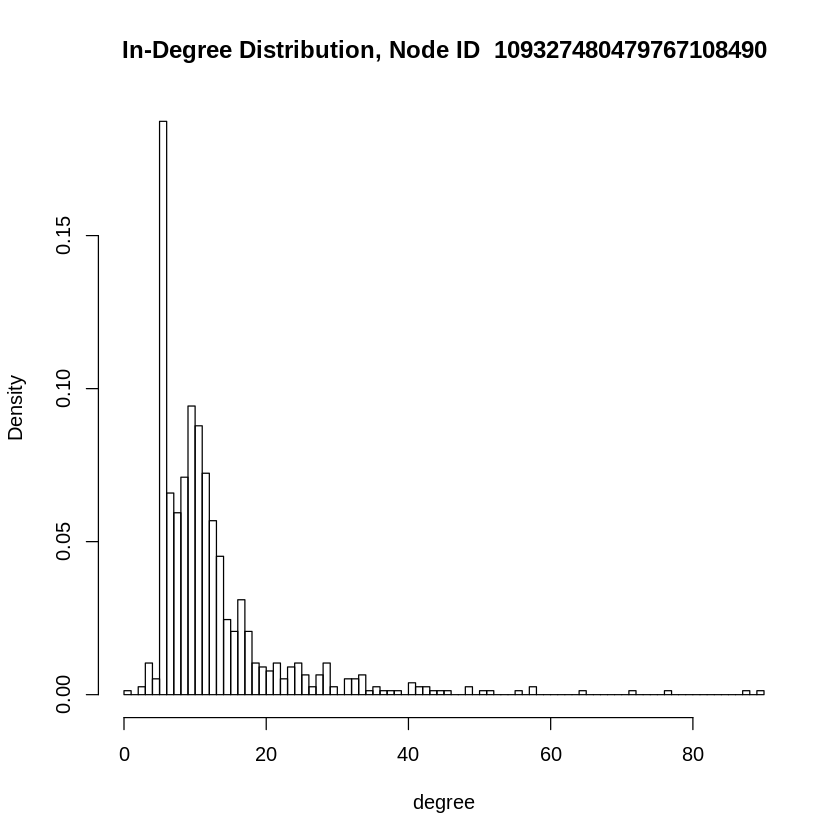

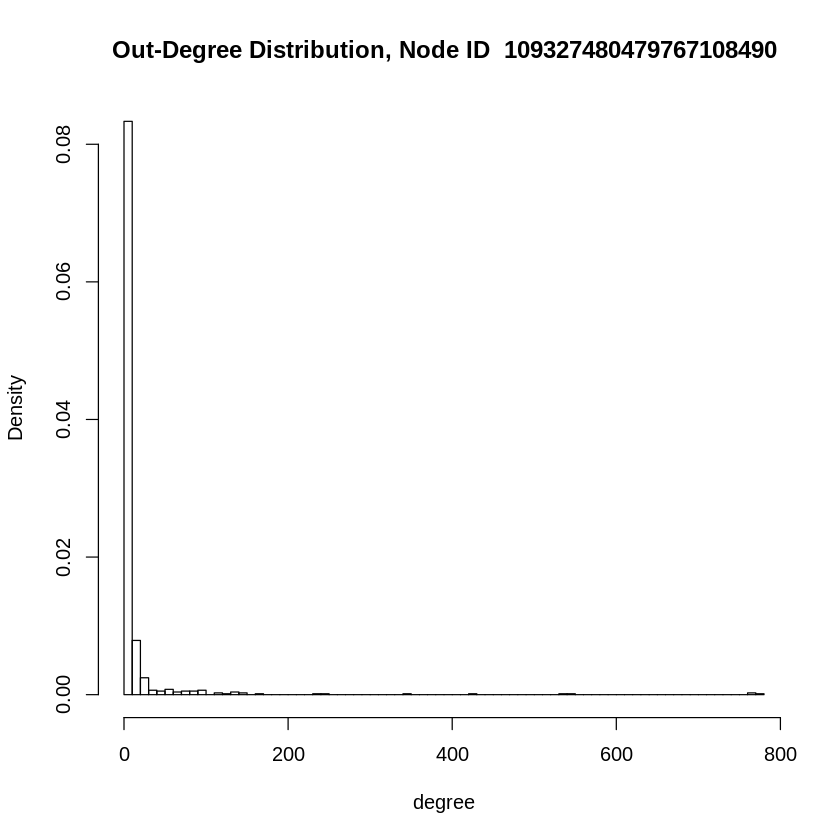

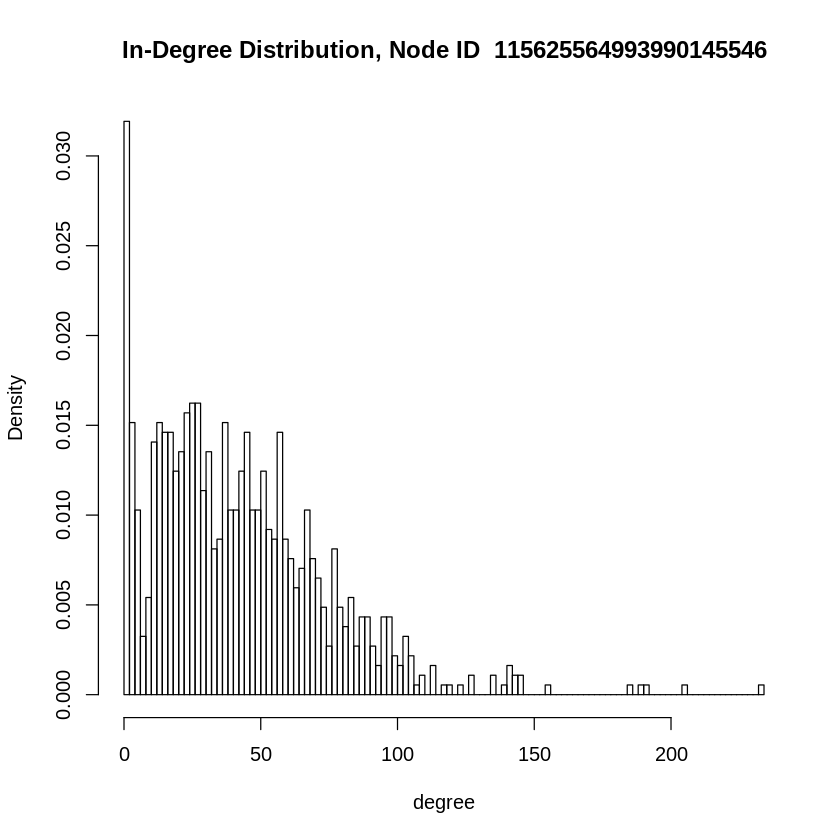

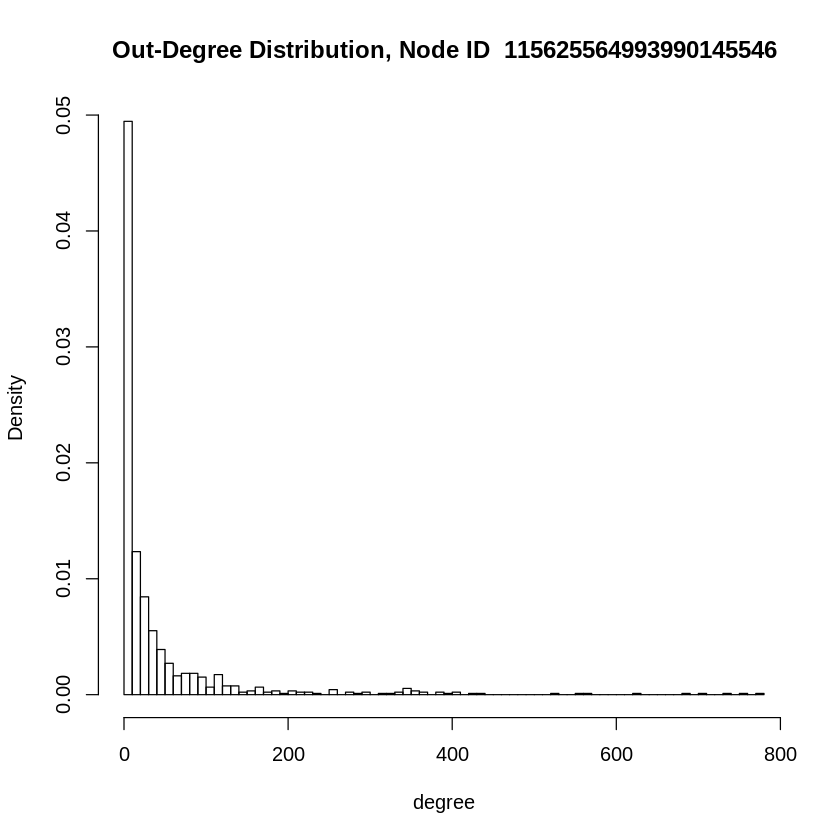

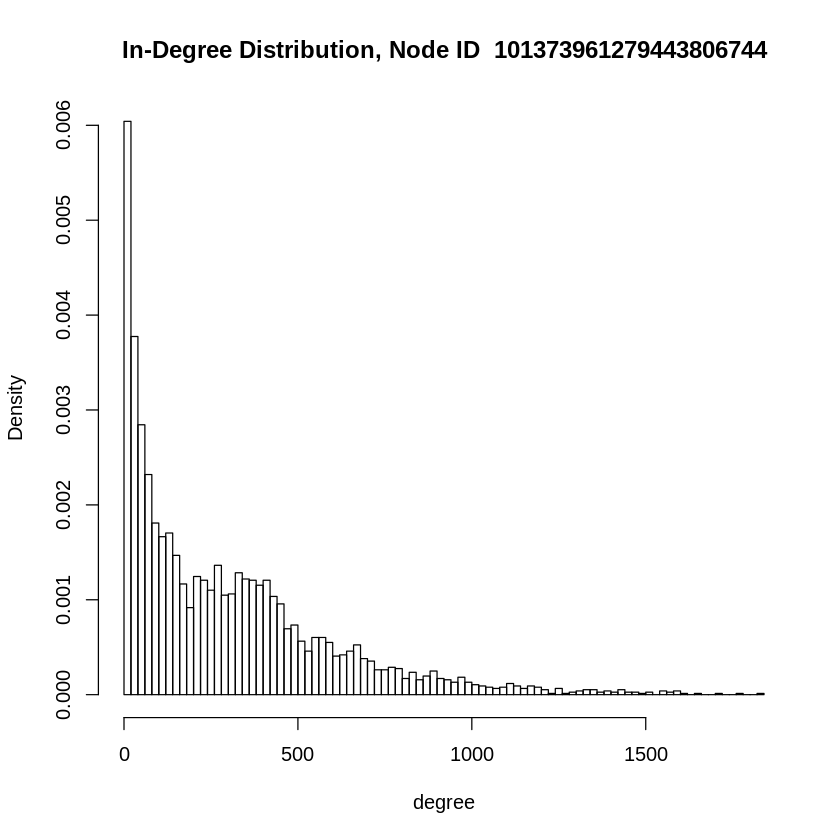

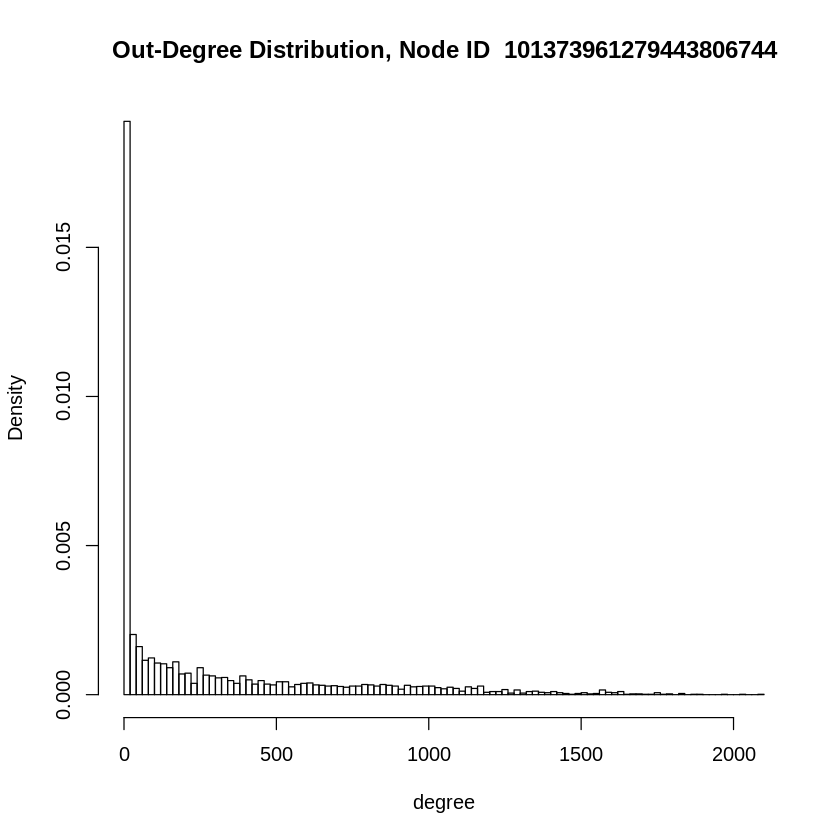

In [ ]:
# Q19
node_id_list = c("109327480479767108490", "115625564993990145546", "101373961279443806744")

for (idx in 1:length(node_id_list)) {
    file_name = paste(getwd(), '/', gplus_path, node_id_list[idx],'.edges', sep="")
    gp_graph = read_graph(file_name, format="ncol", directed=TRUE)
    gp_graph = add.vertices(gp_graph, nv = 1, name = node_id_list[idx])
    
    hist(degree(gp_graph,mode="in"),breaks=100,freq=FALSE,xlab="degree",main=paste("In-Degree Distribution, Node ID ",node_id_list[idx]))
    hist(degree(gp_graph,mode="out"),breaks=100,freq=FALSE,xlab="degree",main=paste("Out-Degree Distribution, Node ID ",node_id_list[idx]))
}

QUESTION 20: For the 3 personal networks picked in Question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots.

Modularity of Node ID = 109327480479767108490 is: 0.2798194

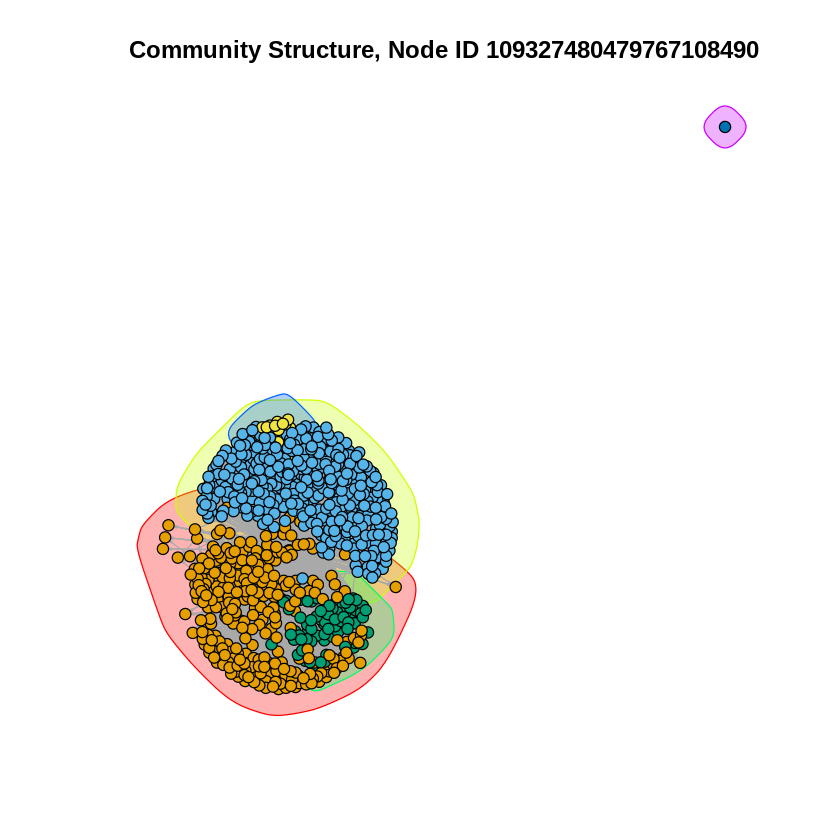

Modularity of Node ID = 115625564993990145546 is: 0.3230868

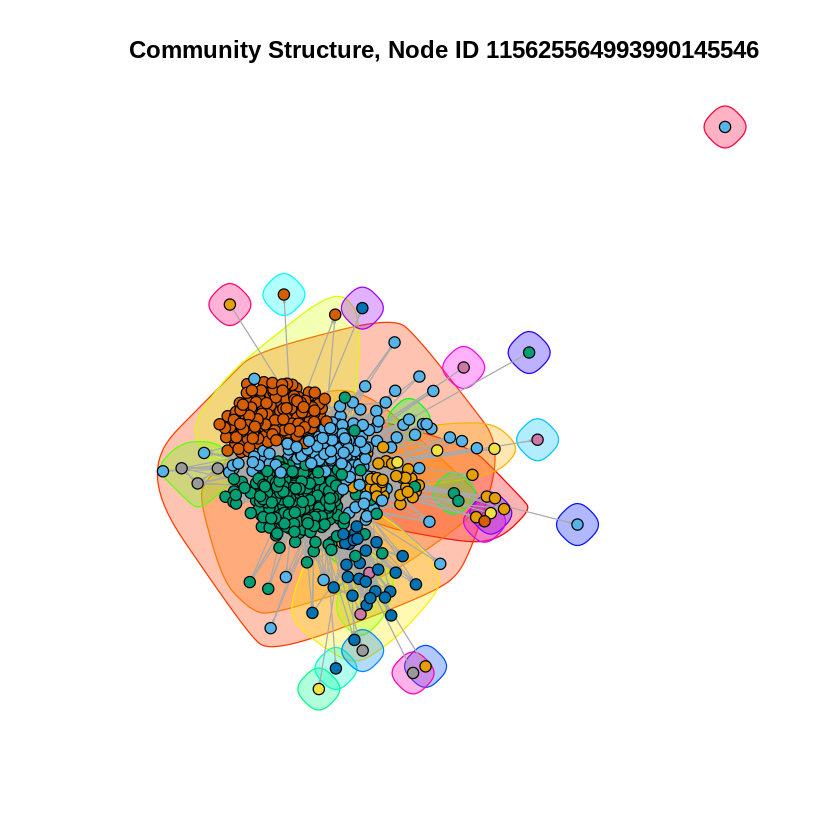

Modularity of Node ID = 101373961279443806744 is: 0.1950912

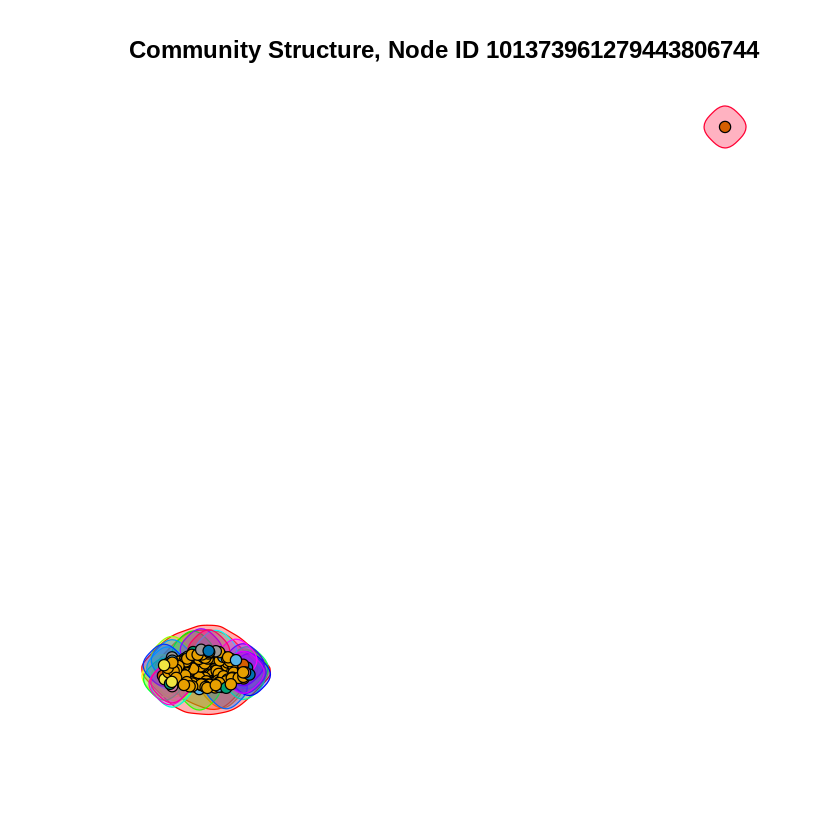

In [ ]:
# Q20
for (idx in 1:length(node_id_list)) {
    file_name = paste(getwd(), '/', gplus_path, node_id_list[idx],'.edges', sep="")
    gp_graph = read_graph(file_name, format="ncol", directed=TRUE)
    gp_graph = add.vertices(gp_graph, nv = 1, name = node_id_list[idx])
    
    gp_com_str = cluster_walktrap(gp_graph)
    plot(gp_graph, mark.groups=groups(gp_com_str), edge.arrow.size=0.1, 
             vertex.color=(gp_com_str$membership), vertex.size=4, vertex.label = NA,
             main=paste("Community Structure, Node ID", node_id_list[idx]))

    cat("Modularity of Node ID =", node_id_list[idx], "is:", modularity(gp_graph, membership(gp_com_str)))
}


QUESTION 22: Compute the h and c values for the community structures of the 3 personal network (same nodes as Question 19). Interpret the values and provide a detailed explanation. Are there negative values? Why?

In [ ]:
# Q22
# Function
Homo_Comp = function(node_id, com_str) {
    file_name = scan(file=paste("./gplus/", node_id, ".circles",sep=""), what="", sep="\n");
    circles <- strsplit(file_name, "[[:space:]]+");
    names(circles) <- sapply(circles, function(x) x[[1]])
    circles <- lapply(circles, function(x) x[-1])
    circle_sizes <- sapply(circles, function(x) length(x)) 
  
    nodes_with_circle <- unique(as.character(unlist(circles)))
    N <- length(nodes_with_circle) 
        
    circle_com <- lapply(groups(com_str), function(x) intersect(x, nodes_with_circle))
    circle_com_sizes <- sapply(circle_com, function(x) length(x))                                   
    non_zero_com <- circle_com_sizes[circle_com_sizes != 0]    
    
    C_Matrix <- c()
    for (i in seq(1, length(circles))) {
        cur_circle_com <- lapply(groups(com_str), function(x) intersect(x, as.character(circles[[i]])))
        com_vector <- sapply(cur_circle_com, function(x) length(x))
        C_Matrix <- cbind(C_Matrix, com_vector)
    }                  

    H_C <- -sum(circle_sizes/N * log(circle_sizes/N))
    H_K <- -sum(non_zero_com/N * log(non_zero_com/N))
                           
    H_CK <- 0
    H_KC <- 0
    for (j in seq(1, length(com_str))) {
        for (i in seq(1, length(circles))) {
            if (C_Matrix[j, i] == 0) {
                next
            }
            H_CK = H_CK + C_Matrix[j, i]/N * log(C_Matrix[j, i]/circle_com_sizes[j])
            H_KC = H_KC + C_Matrix[j, i]/N * log(C_Matrix[j, i]/circle_sizes[i])
        }
    }
    H_CK = -H_CK
    H_KC = -H_KC
    homo <- 1 - H_CK / H_C
    comp <- 1 - H_KC / H_K

    cat("Homogeneity of Node ID =", node_id, "is:", homo, '\n')
    cat("Completeness of Node ID =", node_id, "is:", comp, '\n')
}

In [ ]:
for (idx in 1:length(node_id_list)) {
    file_name = paste(getwd(), '/', gplus_path, node_id_list[idx],'.edges', sep="")
    gp_graph = read_graph(file_name, format="ncol", directed=TRUE)
    gp_graph = add.vertices(gp_graph, nv = 1, name = node_id_list[idx])
    
    gp_com_str = cluster_walktrap(gp_graph)
    Homo_Comp(node_id_list[idx], gp_com_str) 
}

Homogeneity of Node ID = 109327480479767108490 is: 0.8640041 
Completeness of Node ID = 109327480479767108490 is: 0.3456923 
Homogeneity of Node ID = 115625564993990145546 is: 0.4429445 
Completeness of Node ID = 115625564993990145546 is: -3.375718 
Homogeneity of Node ID = 101373961279443806744 is: 0.001839249 
Completeness of Node ID = 101373961279443806744 is: -1.609263 
